In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv ("iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Pearson correlation coefficients

In [6]:
def pearsonr(x, y):
  n = len(x)
  sum_x = float(sum(x))
  sum_y = float(sum(y))
  sum_x_sq = sum(xi*xi for xi in x)
  sum_y_sq = sum(yi*yi for yi in y)
  psum = sum(xi*yi for xi, yi in zip(x, y))
  num = psum - (sum_x * sum_y/n)
  den = pow((sum_x_sq - pow(sum_x, 2) / n) * (sum_y_sq - pow(sum_y, 2) / n), 0.5)
  if den == 0: return 0
  return num / den

In [7]:
pearsonr(df.sepal_length, df.sepal_width)

-0.11756978413303029

# plot the graphs to visualize the correlation between two variables

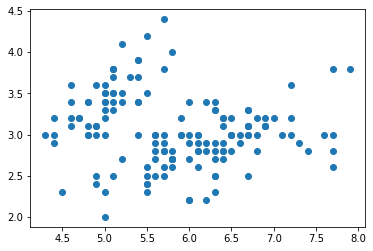

In [9]:
import matplotlib.pyplot as plt
a = (df.sepal_length).to_numpy()
b = (df.sepal_width).to_numpy()
plt.scatter(a,b)

# correlation matrix

In [10]:
data = df.select_dtypes(float,int)
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
covMatrix = np.cov(data,bias=False)
print (covMatrix)

[[4.75       4.42166667 4.35333333 ... 2.915      2.475      2.6       ]
 [4.42166667 4.14916667 4.055      ... 2.95583333 2.50416667 2.62833333]
 [4.35333333 4.055      3.99       ... 2.68833333 2.28166667 2.39666667]
 ...
 [2.915      2.95583333 2.68833333 ... 4.18916667 3.65083333 3.835     ]
 [2.475      2.50416667 2.28166667 ... 3.65083333 3.20916667 3.375     ]
 [2.6        2.62833333 2.39666667 ... 3.835      3.375      3.55      ]]


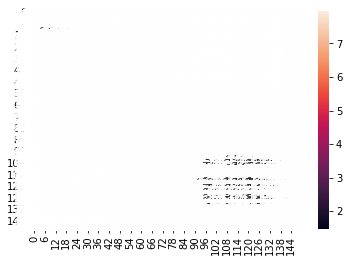

In [14]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(covMatrix, annot=True, fmt='g')
plt.show()

# z-score standardization

In [15]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
data_z = (data-data.mean())/(data.std())
data_z

,sepal_length,sepal_width,petal_length,petal_width
0,-0.897674,1.015602,-1.335752,-1.311052
1,-1.139200,-0.131539,-1.335752,-1.311052
2,-1.380727,0.327318,-1.392399,-1.311052
3,-1.501490,0.097889,-1.279104,-1.311052
4,-1.018437,1.245030,-1.335752,-1.311052
...,...,...,...,...
145,1.034539,-0.131539,0.816859,1.443994
146,0.551486,-1.278680,0.703564,0.919223
147,0.793012,-0.131539,0.816859,1.050416
148,0.430722,0.786174,0.930154,1.443994


# covariance matrix for the standardized data

In [17]:
covMatrix = np.cov(data_z,bias=False)
print (covMatrix)

[[ 1.24718431  0.63846159  0.92515524 ... -0.57166864 -0.15116299
  -0.43489774]
 [ 0.63846159  0.32712814  0.47640372 ... -0.29258274 -0.07089342
  -0.218246  ]
 [ 0.92515524  0.47640372  0.71422546 ... -0.42583117 -0.05097185
  -0.27811553]
 ...
 [-0.57166864 -0.29258274 -0.42583117 ...  0.27272041  0.08151435
   0.19381073]
 [-0.15116299 -0.07089342 -0.05097185 ...  0.08151435  0.17666553
   0.14593047]
 [-0.43489774 -0.218246   -0.27811553 ...  0.19381073  0.14593047
   0.22316406]]


# eigenvalues and eigenvectors

In [18]:
A = covMatrix_data
from numpy.linalg import eig as eigenValuesAndVectors

solution = eigenValuesAndVectors(A)

eigenValues = solution[0]
eigenVectors = solution[1]

In [21]:
idx = eigenValues.argsort()[::-1]   
eigenValues_a = eigenValues[idx]
eigenVectors_a = eigenVectors[:,idx]

In [22]:
eigenValues_a

array([ 5.59512795e+02+0.00000000e+00j,  9.70380789e+01+0.00000000e+00j,
        1.49995944e+00+0.00000000e+00j,  3.02615987e-14+0.00000000e+00j,
        2.70980168e-14+1.28896450e-14j,  2.70980168e-14-1.28896450e-14j,
        1.63741086e-14+2.98716204e-15j,  1.63741086e-14-2.98716204e-15j,
        1.56235634e-14+1.59447604e-14j,  1.56235634e-14-1.59447604e-14j,
        1.31678917e-14+2.74885940e-14j,  1.31678917e-14-2.74885940e-14j,
        1.27794051e-14+2.13326610e-14j,  1.27794051e-14-2.13326610e-14j,
        1.11738840e-14+4.63250436e-15j,  1.11738840e-14-4.63250436e-15j,
        1.10334360e-14+1.05551809e-15j,  1.10334360e-14-1.05551809e-15j,
        9.83827433e-15+2.84561293e-15j,  9.83827433e-15-2.84561293e-15j,
        8.59616675e-15+4.30813876e-15j,  8.59616675e-15-4.30813876e-15j,
        8.54808057e-15+7.26815505e-16j,  8.54808057e-15-7.26815505e-16j,
        7.93376515e-15+3.24945394e-14j,  7.93376515e-15-3.24945394e-14j,
        7.65460978e-15+1.88375251e-15j,  7.65460978

In [23]:
eigenVectors_a

array([[ 0.07714555+0.j        , -0.12097209+0.j        ,
        -0.00326623+0.j        , ...,  0.05121114+0.11622268j,
        -0.04274675+0.1219347j , -0.04274675-0.1219347j ],
       [ 0.07536535+0.j        , -0.09951521+0.j        ,
        -0.0823624 +0.j        , ...,  0.02196213+0.01228899j,
        -0.00275143+0.00259729j, -0.00275143-0.00259729j],
       [ 0.07094687+0.j        , -0.10997061+0.j        ,
        -0.01101448+0.j        , ..., -0.07812519+0.05643132j,
         0.07569207+0.03174995j,  0.07569207-0.03174995j],
       ...,
       [ 0.08314101+0.j        ,  0.05740422+0.j        ,
        -0.0347474 +0.j        , ...,  0.10105927-0.00583843j,
        -0.15952033+0.05110659j, -0.15952033-0.05110659j],
       [ 0.07210003+0.j        ,  0.05423228+0.j        ,
         0.10061554+0.j        , ...,  0.0150888 -0.04452097j,
        -0.06856523-0.01941484j, -0.06856523+0.01941484j],
       [ 0.07575445+0.j        ,  0.05701074+0.j        ,
         0.12572061+0.j       